In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [3]:
llm_df = pd.read_csv('async_posts_details.csv')
midjourney_df = pd.read_csv('async_posts_details.csv')

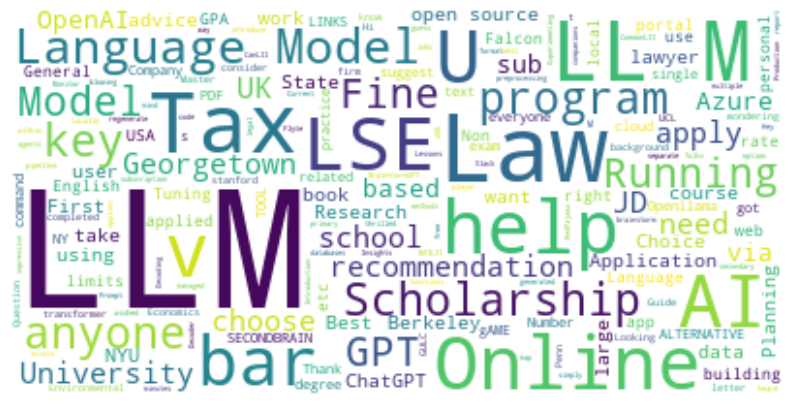

In [4]:
text = " ".join(title for title in llm_df.post_title)

wordcloud = WordCloud(background_color="white", stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

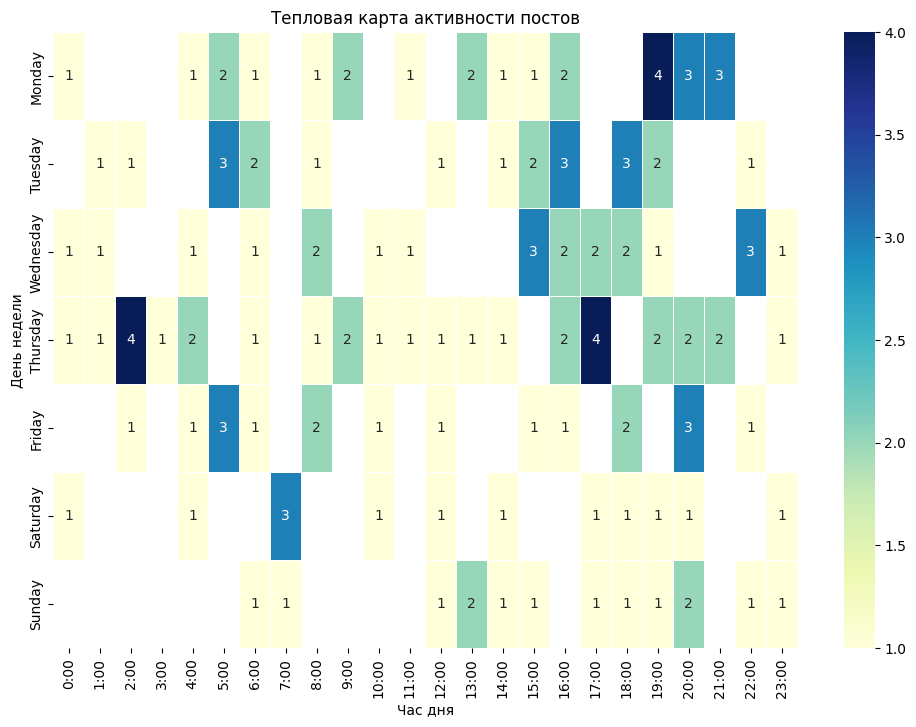

In [5]:
llm_df['date_created'] = pd.to_datetime(llm_df['date_created'])

# Создание столбцов с часом и днём недели
llm_df['hour'] = llm_df['date_created'].dt.hour
llm_df['weekday'] = llm_df['date_created'].dt.dayofweek

# Подготовка данных для тепловой карты
heatmap_data = llm_df.groupby(['weekday', 'hour']).size().unstack()

# Переименование индексов и колонок для лучшей читаемости
heatmap_data.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.columns = [f"{i}:00" for i in range(24)]

# Создание тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True)
plt.title('Тепловая карта активности постов')
plt.xlabel('Час дня')
plt.ylabel('День недели')
plt.show()

In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def clean_tokenize(text):

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

words = []
for title in llm_df['post_title']:
    words.extend(clean_tokenize(title))

# Подсчёт частоты слов
word_counts = Counter(words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\динара\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\динара\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# Вывод 10 наиболее часто встречающихся слов
most_common_words = word_counts.most_common(10)
print("Наиболее часто встречающиеся слова и их количество:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Наиболее часто встречающиеся слова и их количество:
llm: 73
llms: 13
law: 12
tax: 9
online: 7
language: 7
help: 7
us: 7
lse: 7
get: 6


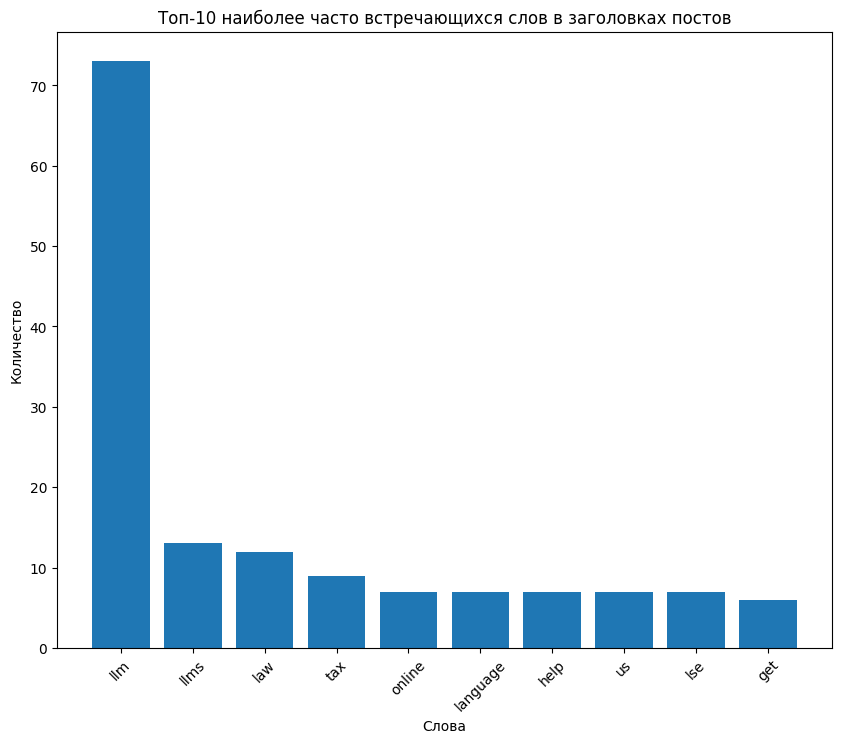

In [8]:
words, counts = zip(*most_common_words)

plt.figure(figsize=(10, 8))
plt.bar(words, counts)
plt.xlabel('Слова')
plt.ylabel('Количество')
plt.title('Топ-10 наиболее часто встречающихся слов в заголовках постов')
plt.xticks(rotation=45)
plt.show()


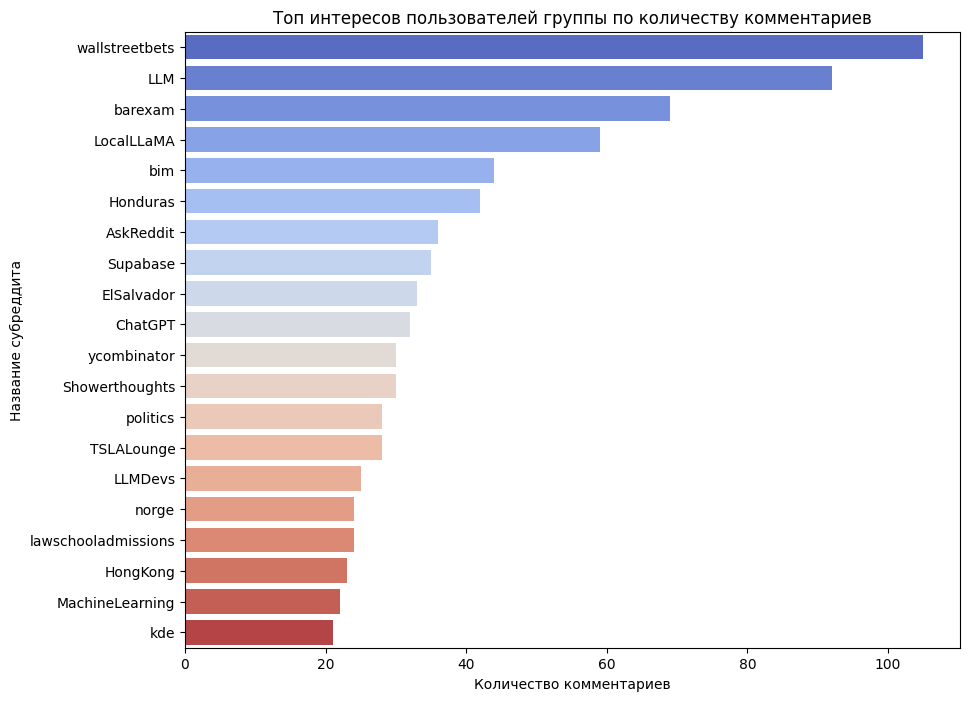

In [17]:
comment_df = pd.read_csv('subreddits_commented.csv')
df_sorted = comment_df.sort_values('comment_amount', ascending=False)
N = 20
df_top_n = df_sorted.head(N)
plt.figure(figsize=(10, 8))  
sns.barplot(x='comment_amount', y='subreddit_name', data=df_top_n, palette='coolwarm')
plt.xlabel('Количество комментариев')
plt.ylabel('Название субреддита')
plt.title('Топ интересов пользователей группы по количеству комментариев')
plt.show()


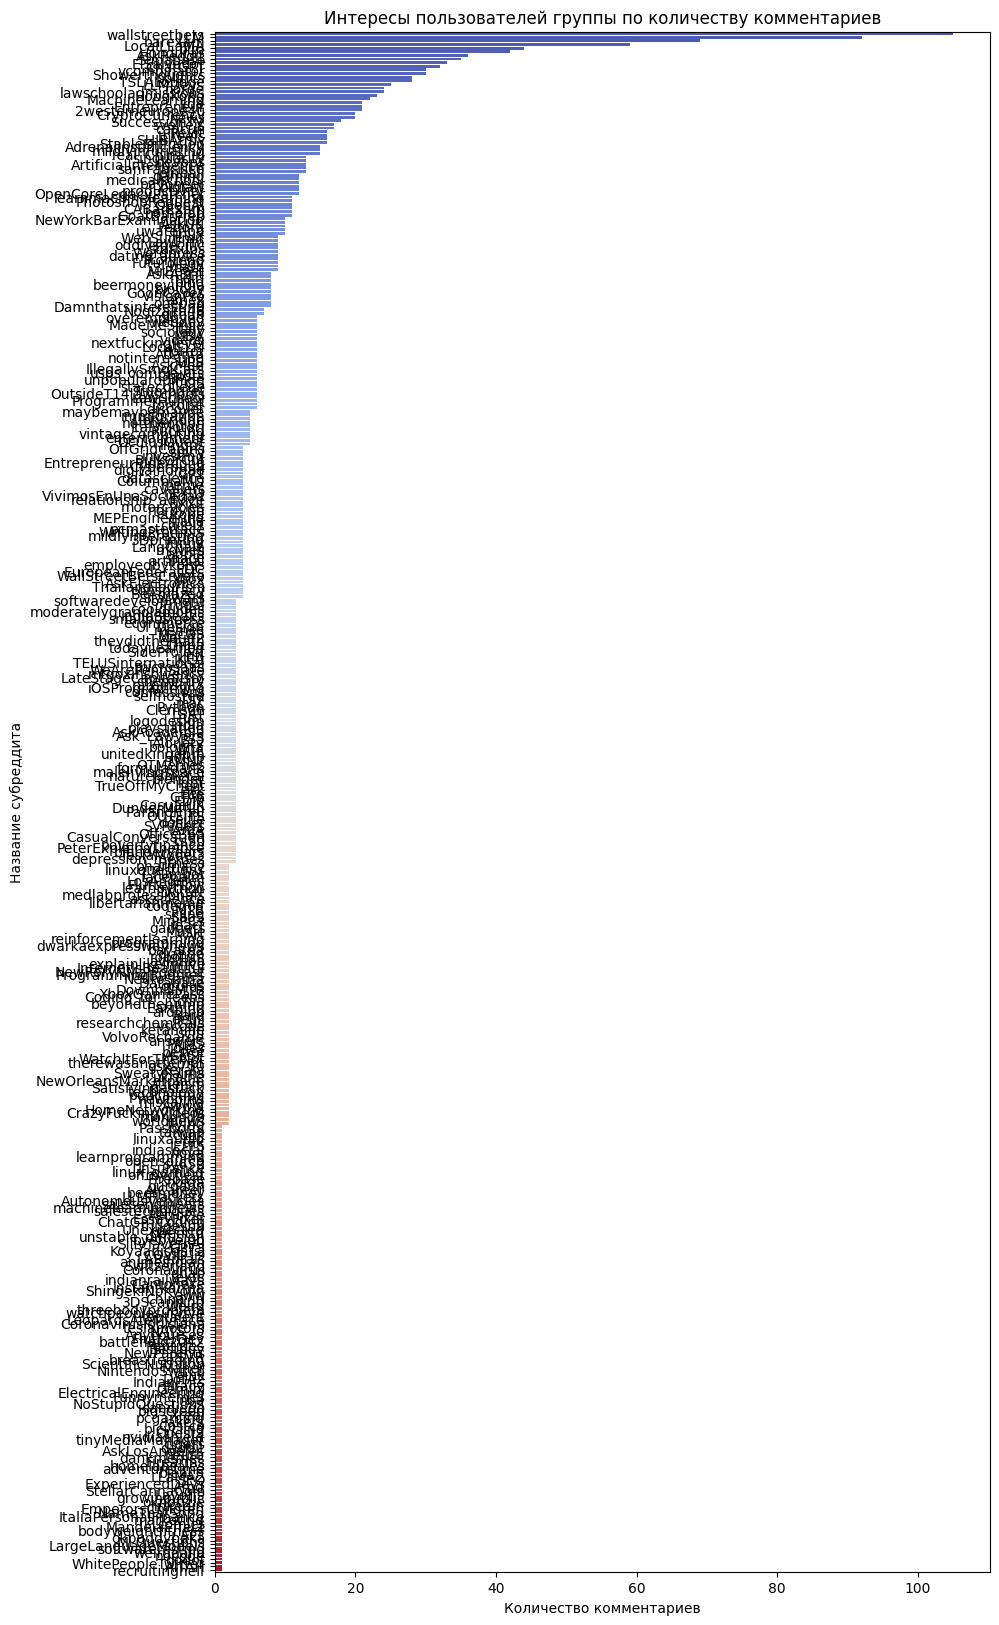